In [69]:
def partition(Arr, p, r):
    x = Arr[r] # x = 7
    # p is the index of the first element of the array.
    # r is the index of the last element of the array.
    i = p - 1 # i is the pointer which point at the element before the first element of the array

    # from the first index to the index before the last
    j = p
    for j in range(j, r): # Must be careful about the index system !!!!!!!!!!!!!!!!!!
        #print(f'Current j is {j} element at array j is {Arr[j]}, x is {x}, Current i is {i}')
        if Arr[j] <= x:
            i = i + 1
            Arr[i], Arr[j] = Arr[j], Arr[i] # Swap element at pointer i with element at pointer j
            #print(f'Arr after swap is {Arr}')
    Arr[i + 1], Arr[r] = Arr[r], Arr[i + 1] # Swap element at Arr[i]
    return i + 1

def quicksort(Arr, p, r):
    #print(f'Current Arr is {Arr}, Current p is {p}, Current r is {r}')
    #print(f'Current array lenght = {len(Arr)}')
    if len(Arr) == 1:
        return Arr

    if p < r:
        q = partition(Arr, p, r)
        quicksort(Arr, p, q - 1)
        quicksort(Arr, q + 1, r)
            


In [70]:
# Heap sort
def left(index):
    if index == 0:
        return 1
    else:
        return (index * 2) + 1
def right(index):
    if index == 0:
        return 2
    else:
        return (index * 2) + 2


def max_heapify(inputarray, index, arrsize):

    

    l = left(index)
    r = right(index)
    largest = index

    if (l < arrsize) and (inputarray[l] > inputarray[largest]):
            largest = l
        
    if (r < arrsize) and (inputarray[r] > inputarray[largest]):
            largest = r
            
    if largest != index:

        temp = inputarray[index]
        inputarray[index] = inputarray[largest]
        inputarray[largest] = temp

        max_heapify(inputarray, largest, arrsize)


def build_max_heap(inputarray):
    lenght = len(inputarray)
    for i in range(lenght // 2 - 1, -1, -1):
        max_heapify(inputarray, i, lenght)

def heapsort(inputarray):
    lenght = len(inputarray)
    


    build_max_heap(inputarray)
    
    
    for i in range(lenght - 1, 0, -1):
        temp = inputarray[0]
        inputarray[0] = inputarray[i]
        inputarray[i] = temp
        max_heapify(inputarray, 0, i)



In [71]:
def merge_sort(inputarray):

    # If array size is 1 we can not divide it anymore
    if len(inputarray) <= 1:
        return inputarray
    inputarray_lenght = len(inputarray)
    mid = int(inputarray_lenght / 2)
    left_array = inputarray[0:mid]
    right_array = inputarray[mid:]

    #print(f'left_array is {left_array} and right_array is {right_array}') # For debugging
    left_array = merge_sort(left_array) # Divide the left array into the smaller one
    right_array = merge_sort(right_array) # Divide the right array into the smaller one

    return merge_two_array(left_array, right_array)

def merge_two_array(left, right):


    n1 = len(left) # lenght of left array
    n2 = len(right) # lenght of right array

    sorted_list = [0] * (n1 + n2) # Create new array that can fit all element from the left and right array

    i = 0 # Left array pointer
    j = 0 # Right array pointer
    k = 0 # Sorted_list pointer

    # Move the pointer
    #print(f'merge two array || left_array is {left} and right_array is {right}') # For debug

    while (i < n1 and j < n2):
        if left[i] <= right[j]:
            sorted_list[k] = left[i] #1
            i = i + 1
            k = k + 1
        else:
            sorted_list[k] = right[j] #2
            j = j + 1
            k = k + 1

    # When pointer is point to out of range copy the rest element of the other array
    while i < n1:
        sorted_list[k] = left[i] #3 
        i = i + 1
        k = k + 1

    while j < n2:
        sorted_list[k] = right[j] #4
        j = j + 1
        k = k + 1

    return sorted_list

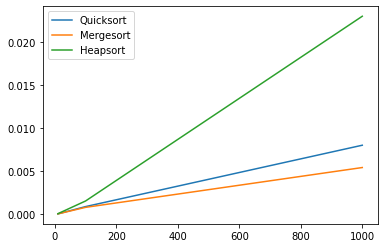

In [88]:
from random import sample
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt

# Edit from Prof.Chaklam code

num_samples = [10, 100, 1000]



test_arr = []
j = 10
for i in range(3):
    temp = np.random.randint(-1000, 1000, j)
    test_arr.append(temp)
    j = j * 10


time_quicksort = []
time_heapsort = []
time_mergesort = []

for n in range(3):
    Arr = test_arr[n]
    time = timeit('quicksort(Arr, 0, len(Arr) - 1)', number=1, globals=globals())
    time_quicksort.append(time)

    time = timeit('merge_sort(Arr)', number=1, globals=globals())
    time_mergesort.append(time)
    
    time = timeit('heapsort(Arr)', number=1, globals=globals())
    time_heapsort.append(time)


#plt.plot(num_samples, y_nlogn, label='nlogn')
plt.plot(num_samples, time_quicksort, label='Quicksort')
plt.plot(num_samples, time_mergesort, label='Mergesort')
plt.plot(num_samples, time_heapsort, label='Heapsort')

plt.legend()
plt.show()
